# Clustering based on EC-ERA5

In this notebook, we perform clustering based on the the PCA results of EC-ERA5 dataset.


## Dataset

The dataset we used includes 16 characteristic levels, namely: *sea level pressure, geopotential at 500hPa, u and v at 200hPa, and (u, v, T, q) at 925, 850, and 700 hPa*. The EC-ERA5 dataset is 0.25 degree interval, and the domain we analyzed is: 100 - 140 E / 10 - 50 N.

## Read PCA projection

(14608, 20)
Index(['mslp_pc1', 'mslp_pc2', 'mslp_pc3', 'mslp_pc4', 'mslp_pc5', 'mslp_pc6',
       'mslp_pc7', 'mslp_pc8', 'mslp_pc9', 'mslp_pc10', 'mslp_pc11',
       'mslp_pc12', 'mslp_pc13', 'mslp_pc14', 'mslp_pc15', 'mslp_pc16',
       'mslp_pc17', 'mslp_pc18', 'mslp_pc19', 'mslp_pc20'],
      dtype='object')


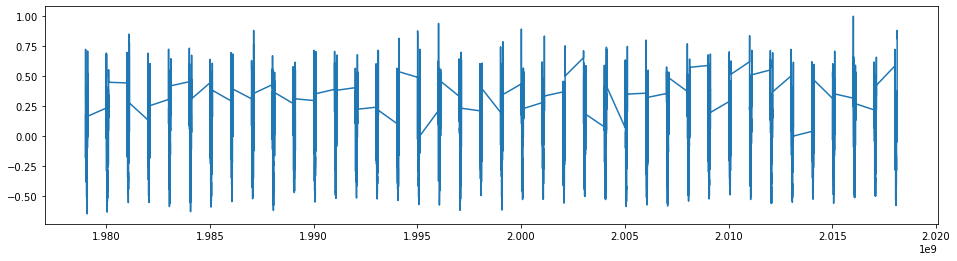

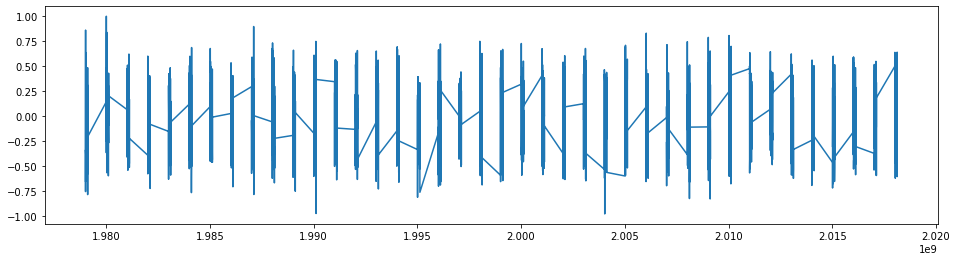

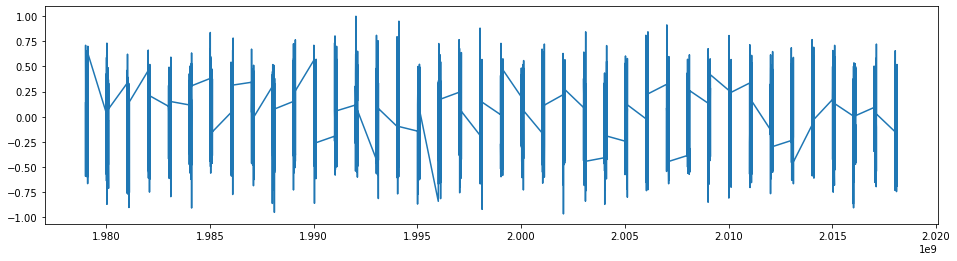

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Defined Parameters
PROJPATH = '../data/pca_era5/projection/'
PROJSUFFIX = '.proj.csv'
LAYERS = ['mslp', 'q925','t925','u925','v925','q850','t850','u850','v850','q700','t700','u700','v700','h500','u200','v200']

def read_20_pcs(fname, varname=''):
    ''' Read PCs from specified file.'''
    import pandas as pd
    import numpy as np
    data = pd.read_csv(fname, index_col=0)
    data = data.iloc[:,:20]
    data.columns = [varname+"pc"+str(i+1) for i in range(20)]
    return(data)

tmp = read_20_pcs(PROJPATH+LAYERS[0]+PROJSUFFIX, LAYERS[0]+'_')

print(tmp.shape)
print(tmp.columns)

plt.figure(figsize=(16,4))
plt.plot(tmp['mslp_pc1']/tmp['mslp_pc1'].max())
plt.show()

plt.figure(figsize=(16,4))
plt.plot(tmp['mslp_pc2']/tmp['mslp_pc2'].max())
plt.show()

plt.figure(figsize=(16,4))
plt.plot(tmp['mslp_pc3']/tmp['mslp_pc3'].max())
plt.show()

## Aggregation of 16 CLs



In [13]:
# Define all fields to read
PROJPATH = '../data/pca_era5/projection/'
PROJSUFFIX = '.proj.csv'
LAYERS = ['mslp', 'q925','t925','u925','v925','q850','t850','u850','v850','q700','t700','u700','v700','h500','u200','v200']
# Read MLSP
data = read_20_pcs(PROJPATH+LAYERS[0]+PROJSUFFIX, LAYERS[0]+'_')
# Read and merge all layers
for l in LAYERS[1:]:
    fname = PROJPATH+l+PROJSUFFIX
    tmp = read_20_pcs(fname, varname=l)
    data = data.merge(tmp, left_index=True, right_index=True, suffixes=("","_"+l))

print(data.shape)
print(data.columns)

(14608, 320)
Index(['mslp_pc1', 'mslp_pc2', 'mslp_pc3', 'mslp_pc4', 'mslp_pc5', 'mslp_pc6',
       'mslp_pc7', 'mslp_pc8', 'mslp_pc9', 'mslp_pc10',
       ...
       'v200pc11', 'v200pc12', 'v200pc13', 'v200pc14', 'v200pc15', 'v200pc16',
       'v200pc17', 'v200pc18', 'v200pc19', 'v200pc20'],
      dtype='object', length=320)
